In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import venn

from itertools import zip_longest
from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [4]:
MASIGPRO_ALL_df = pd.read_csv(r"Combined_SigPvalues.csv",header=[0])
MASIGPRO_MALE_df = pd.read_csv(r"MALE_SigPvalues.csv",header=[0])
MASIGPRO_FEMALE_df = pd.read_csv(r"FEMALE_SigPvalues.csv",header=[0])

m_all_gene_list = set(MASIGPRO_ALL_df["Gene_Name"])
m_male_gene_list = set(MASIGPRO_MALE_df["Gene_Name"])
m_female_gene_list = set(MASIGPRO_FEMALE_df["Gene_Name"])

In [ ]:
GPCOUNTS_ALL_df = pd.read_csv(r"ALL Significant.csv", header=[0])
GPCOUNTS_MALE_df = pd.read_csv(r"Male Significant.csv", header=[0])
GPCOUNTS_FEMALE_df = pd.read_csv(r"Female Significant.csv", header=[0])

g_all_gene_list = set(GPCOUNTS_ALL_df["Gene_Name"])
g_male_gene_list = set(GPCOUNTS_MALE_df["Gene_Name"])
g_female_gene_list = set(GPCOUNTS_FEMALE_df["Gene_Name"])

In [ ]:
#
#Set comparison

In [14]:
print(len(g_all_gene_list))
print(len(m_all_gene_list))
found_in_all = m_all_gene_list & g_all_gene_list
print(len(found_in_all))
unique_to_m_all = m_all_gene_list - g_all_gene_list
print(len(unique_to_m_all))
unique_to_g_all = g_all_gene_list - m_all_gene_list
print(len(unique_to_g_all))

6393
2197
1942
255
4451


In [16]:
print(len(m_female_gene_list))
print(len(g_female_gene_list))
found_in_female = m_female_gene_list & g_female_gene_list
print(len(found_in_female))
unique_to_m_female = m_female_gene_list - g_female_gene_list
print(len(unique_to_m_female))
unique_to_g_female = g_female_gene_list - m_female_gene_list
print(len(unique_to_g_female))

4542
3509
2223
2319
1286


In [15]:
print(len(m_male_gene_list))
print(len(g_male_gene_list))
found_in_male = m_male_gene_list & g_male_gene_list
print(len(found_in_male))
unique_to_m_male = m_male_gene_list - g_male_gene_list
print(len(unique_to_m_male))
unique_to_g_male = g_male_gene_list - m_male_gene_list
print(len(unique_to_g_male))

4227
2364
1765
2462
599


In [ ]:
#
#Sets to .csvs

In [19]:
GO_FEMALE = pd.DataFrame(list(zip_longest(found_in_female, unique_to_m_female, unique_to_g_female)),
                         columns=["Combined Female", "maSigPro Female", "GPcounts Female"])
GO_FEMALE.to_csv("GO_FEMALE.csv")

In [20]:
GO_MALE = pd.DataFrame(list(zip_longest(found_in_male, unique_to_m_male, unique_to_g_male)),
                         columns=["Combined Male", "maSigPro Male", "GPcounts Male"])
GO_MALE.to_csv("GO_MALE.csv")

In [21]:
GO_COMBINED= pd.DataFrame(list(zip_longest(found_in_all, unique_to_m_all, unique_to_g_all)),
                         columns=["Combined All", "maSigPro All", "GPcounts All"])
GO_COMBINED.to_csv("GO_COMBINED.csv")

In [ ]:
#
#Venn Diagrams

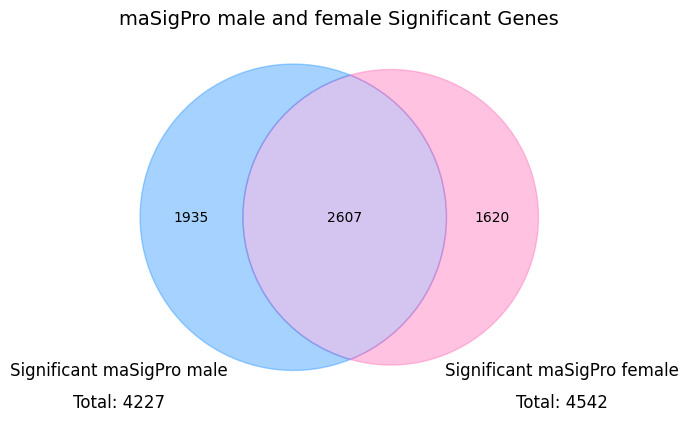

In [23]:
#maSigPro Male vs Female

masigpro_shared = m_female_gene_list & m_male_gene_list
masigpro_male_unique = m_male_gene_list - m_female_gene_list
masigpro_female_unique = m_female_gene_list - m_male_gene_list

MASIGPRO_IDENTIFIED = pd.DataFrame(list(zip_longest(masigpro_shared, masigpro_male_unique, masigpro_female_unique)),
                                  columns=["maSigPro Shared", "maSigPro Male", "maSigPro Female"])
MASIGPRO_IDENTIFIED.to_csv("MASIGPRO_IDENTIFIED.csv")

# Define sets
m_female = m_female_gene_list
m_male = m_male_gene_list

# Create a Venn diagram
venn_plot = venn2(
    [m_female, m_male], 
    (" ", " ")
)

# Label total counts for each set
venn_plot.get_label_by_id("10").set_text(f"{len(m_female_gene_list - m_male_gene_list)}")  # Unique to Female
venn_plot.get_patch_by_id("10").set_color("#1e90ff")
venn_plot.get_label_by_id("01").set_text(f"{len(m_male_gene_list - m_female_gene_list)}")  # Unique to Male
venn_plot.get_patch_by_id("01").set_color("#ff69b4")
venn_plot.get_label_by_id("11").set_text(f"{len(m_male_gene_list & m_female_gene_list)}")  # Overlap count
venn_plot.get_patch_by_id("11").set_color("#9370db")

total_male = len(m_male_gene_list)
total_female = len(m_female_gene_list)
plt.text(-0.7, -0.6, f"Total: {total_male}", fontsize=12, color="black", ha="center")   # Total for maSigPro
plt.text(0.7, -0.6, f"Total: {total_female}", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(-0.7, -0.5, f"Significant maSigPro male", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(0.7, -0.5, f"Significant maSigPro female", fontsize=12, color="black", ha="center")  # Total for GPcounts

# Title and show
plt.title("maSigPro male and female Significant Genes", fontsize=14)
plt.savefig("masigpro_venn_labeled.png", format="png")  # Save as PNG
plt.show()

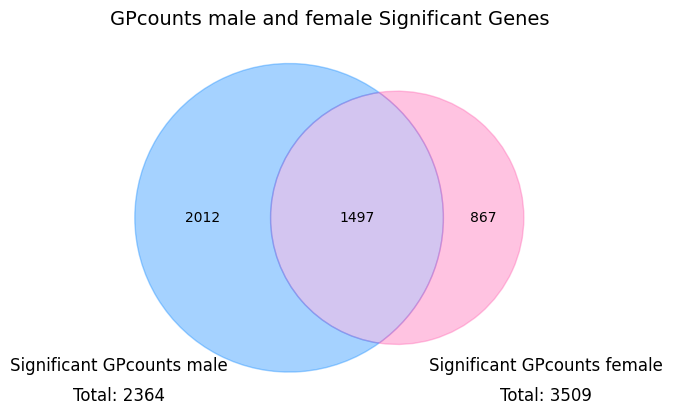

In [24]:
#Male vs Female Gpcounts 

gpcounts_shared = g_female_gene_list & g_male_gene_list
gpcounts_male_unique = g_male_gene_list - g_female_gene_list
gpcounts_female_unique = g_female_gene_list - g_male_gene_list

GPCOUNTS_IDENTIFIED = pd.DataFrame(list(zip_longest(gpcounts_shared, gpcounts_male_unique, gpcounts_female_unique)),
                                  columns=["GPcounts Shared", "GPcounts Male", "GPcounts Female"])

GPCOUNTS_IDENTIFIED.to_csv("GPCOUNTS_IDENTIFIED.csv")

# Define sets
g_female = g_female_gene_list
g_male = g_male_gene_list

# Create a Venn diagram
venn_plot = venn2(
    [g_female, g_male], 
    (" ", " ")
)

# Label total counts for each set
venn_plot.get_label_by_id("10").set_text(f"{len(g_female_gene_list - g_male_gene_list)}")  # Unique to Female
venn_plot.get_patch_by_id("10").set_color("#1e90ff")
venn_plot.get_label_by_id("01").set_text(f"{len(g_male_gene_list - g_female_gene_list)}")  # Unique to Male
venn_plot.get_patch_by_id("01").set_color("#ff69b4")
venn_plot.get_label_by_id("11").set_text(f"{len(g_male_gene_list & g_female_gene_list)}")  # Overlap count
venn_plot.get_patch_by_id("11").set_color("#9370db")


total_male = len(g_male_gene_list)
total_female = len(g_female_gene_list)
plt.text(-0.7, -0.6, f"Total: {total_male}", fontsize=12, color="black", ha="center")   # Total for maSigPro
plt.text(0.7, -0.6, f"Total: {total_female}", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(-0.7, -0.5, f"Significant GPcounts male", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(0.7, -0.5, f"Significant GPcounts female", fontsize=12, color="black", ha="center")  # Total for GPcounts

# Title and show
plt.title("GPcounts male and female Significant Genes", fontsize=14)
plt.savefig("GPcounts_venn_labeled.png", format="png")  # Save as PNG
plt.show()

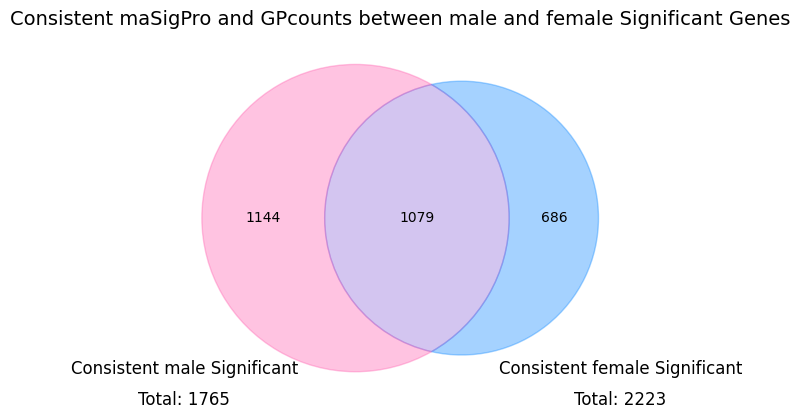

In [57]:
#Consistent

shared = found_in_male & found_in_female 
male_unique = found_in_male - found_in_female
female_unique = found_in_female - found_in_male

CONSISTENT_IDENTIFIED = pd.DataFrame(list(zip_longest(shared, male_unique, female_unique)),
                                  columns=["maSigPro GPcounts Shared", "maSigPro GPcounts unique Male", "maSigPro GPcounts unique Female"])

CONSISTENT_IDENTIFIED.to_csv("CONSISTENT_IDENTIFIED.csv")

male = found_in_male
female = found_in_female

# Create a Venn diagram
venn_plot = venn2(
    [female, male], 
    (" ", " ")
)

# Label total counts for each set
venn_plot.get_label_by_id("10").set_text(f"{len(female_unique)}") # Unique to Female
venn_plot.get_patch_by_id("10").set_color("#ff69b4")
venn_plot.get_label_by_id("01").set_text(f"{len(male_unique)}")  # Unique to Male
venn_plot.get_patch_by_id("01").set_color("#1e90ff")
venn_plot.get_label_by_id("11").set_text(f"{len(found_in_male & found_in_female)}") # Overlap count
venn_plot.get_patch_by_id("11").set_color("#9370db")

total_male = len(male_unique)
total_female = len(female_unique)
plt.text(-0.7, -0.6, f"Total: {len(found_in_male)}", fontsize=12, color="black", ha="center")   # Total for maSigPro
plt.text(0.7, -0.6, f"Total: {len(found_in_female)}", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(-0.7, -0.5, f"Significant Consistent male", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(0.7, -0.5, f"Significant Consistent female", fontsize=12, color="black", ha="center")  # Total for GPcounts

# Title and show
plt.title("Consistent maSigPro and GPcounts between male and female Significant Genes", fontsize=14)
plt.savefig("consistent_venn_labeled.png", format="png")  # Save as PNG
plt.show()

In [29]:
#

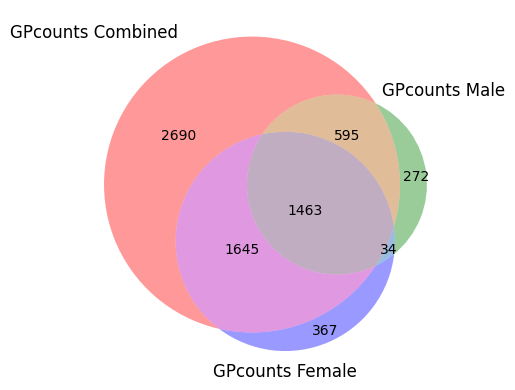

<Figure size 640x480 with 0 Axes>

In [85]:
#GPcounts

set1 = g_all_gene_list
set2 = g_male_gene_list
set3 = g_female_gene_list

venn3([set1, set2, set3], set_labels=('GPcounts Combined', 'GPcounts Male', 'GPcounts Female'))
plt.show()

plt.savefig("GPcounts_three_venn_labeled.png", format="png")  # Save as PNG
plt.show()

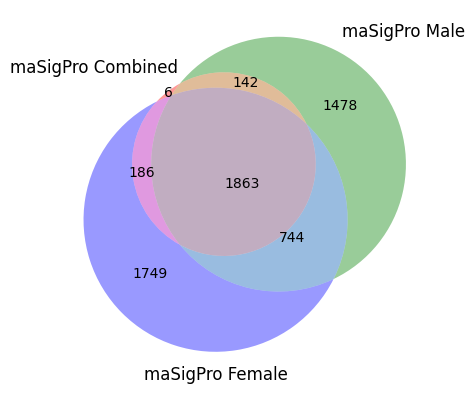

<Figure size 640x480 with 0 Axes>

In [87]:
#maSigPro

set4 = m_all_gene_list
set5 = m_male_gene_list
set6 = m_female_gene_list

venn3([set4, set5, set6], set_labels=('maSigPro Combined', 'maSigPro Male', 'maSigPro Female'))
plt.show()

plt.savefig("masigpro_three_venn_labeled.png", format="png")  # Save as PNG
plt.show()

In [ ]:
#

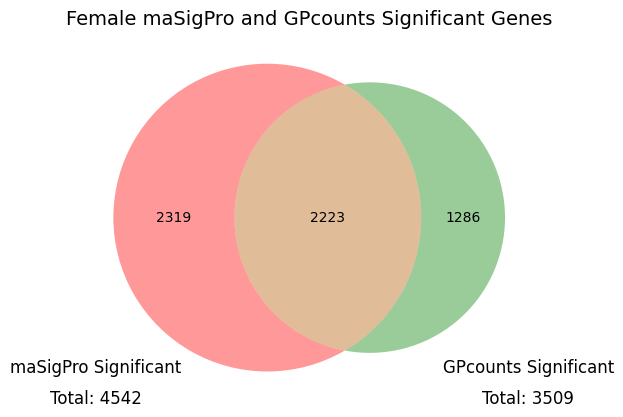

In [141]:
#Female GPcounts vs maSigPro

# Define sets
m_female = m_female_gene_list
g_female = g_female_gene_list

# Create a Venn diagram
venn_plot = venn2(
    [m_female, g_female], 
    (" ", " ")
)

# Label total counts for each set
venn_plot.get_label_by_id("10").set_text(f"{len(m_female_gene_list - g_female_gene_list)}")  # Unique to maSigPro
venn_plot.get_label_by_id("01").set_text(f"{len(g_female_gene_list - m_female_gene_list)}")  # Unique to GPcounts
venn_plot.get_label_by_id("11").set_text(f"{len(m_female_gene_list & g_female_gene_list)}")  # Overlap count

total_m = len(m_female_gene_list)
total_g = len(g_female_gene_list)
plt.text(-0.7, -0.6, f"Total: {total_m}", fontsize=12, color="black", ha="center")   # Total for maSigPro
plt.text(0.7, -0.6, f"Total: {total_g}", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(-0.7, -0.5, f"maSigPro Significant", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(0.7, -0.5, f"GPcounts Significant", fontsize=12, color="black", ha="center")  # Total for GPcounts

# Title and show
plt.title("Female maSigPro and GPcounts Significant Genes", fontsize=14)
plt.savefig("female_venn_labeled.png", format="png")  # Save as PNG
plt.show()

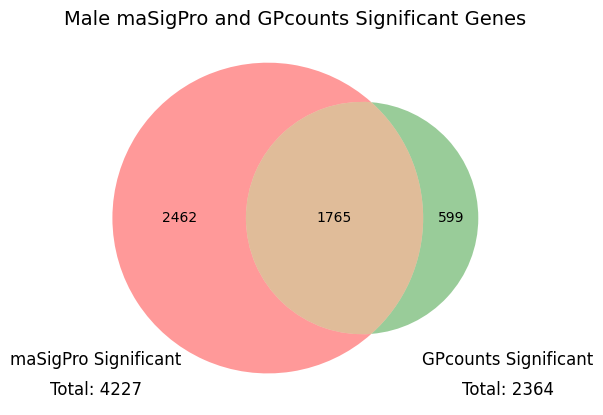

In [142]:
#Male GPcounts vs maSigPro

m_male = m_male_gene_list
g_male = g_male_gene_list

# Create a Venn diagram
venn_plot = venn2(
    [m_male, g_male], 
    (" ", " ")
)

# Label total counts for each set
venn_plot.get_label_by_id("10").set_text(f"{len(m_male_gene_list - g_male_gene_list)}")  # Unique to maSigPro
venn_plot.get_label_by_id("01").set_text(f"{len(g_male_gene_list - m_male_gene_list)}")  # Unique to GPcounts
venn_plot.get_label_by_id("11").set_text(f"{len(m_male_gene_list & g_male_gene_list)}")  # Overlap count

male_total_m = len(m_male_gene_list)
male_total_g = len(g_male_gene_list)
plt.text(-0.7, -0.6, f"Total: {male_total_m}", fontsize=12, color="black", ha="center")   # Total for maSigPro
plt.text(0.7, -0.6, f"Total: {male_total_g}", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(-0.7, -0.5, f"maSigPro Significant", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(0.7, -0.5, f"GPcounts Significant", fontsize=12, color="black", ha="center")  # Total for GPcounts

# Title and show
plt.title("Male maSigPro and GPcounts Significant Genes", fontsize=14)
plt.savefig("Male_venn_labeled.png", format="png")  # Save as PNG
plt.show()

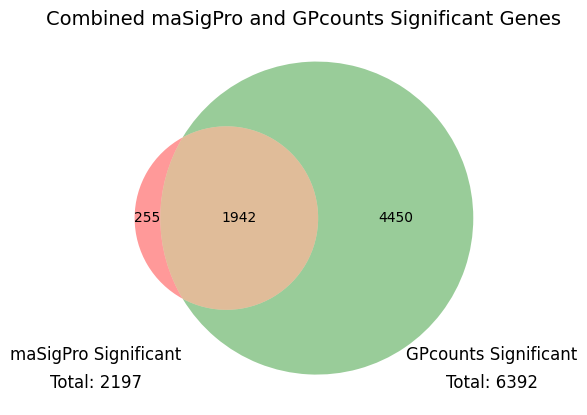

In [191]:
m_all = m_all_gene_list
g_all = g_all_gene_list

# Create a Venn diagram
venn_plot = venn2(
    [m_all, g_all], 
    (" ", " ")
)

# Label total counts for each set
venn_plot.get_label_by_id("10").set_text(f"{len(m_all_gene_list - g_all_gene_list)}")  # Unique to maSigPro
venn_plot.get_label_by_id("01").set_text(f"{len(g_all_gene_list - m_all_gene_list)}")  # Unique to GPcounts
venn_plot.get_label_by_id("11").set_text(f"{len(m_all_gene_list & g_all_gene_list)}")  # Overlap count

all_total_m = len(m_all_gene_list)
all_total_g = len(g_all_gene_list)
plt.text(-0.7, -0.6, f"Total: {all_total_m}", fontsize=12, color="black", ha="center")   # Total for maSigPro
plt.text(0.7, -0.6, f"Total: {all_total_g}", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(-0.7, -0.5, f"maSigPro Significant", fontsize=12, color="black", ha="center")  # Total for GPcounts
plt.text(0.7, -0.5, f"GPcounts Significant", fontsize=12, color="black", ha="center")  # Total for GPcounts

# Title and show
plt.title("Combined maSigPro and GPcounts Significant Genes", fontsize=14)
plt.savefig("Combined_venn_labeled.png", format="png")  # Save as PNG
plt.show()